# Set things up to get data from YouTube

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
# from IPython.display import JSON

In [2]:
api_key = ''   # your key here from Google Developer - YouTuve APIkey

This csv is one that I made by looking in the source code for each of the channels I wanted to analyze.  These are my favorite YouTube true crime channels.

In [3]:
id_df = pd.read_csv('data/YouTubeChannelids.csv')
id_df

,channel_name,channel_id
0,Bailey Sarian,UCtNdVINwfYFTQEEZgMiQ8FA
1,JCS - Criminal Psychology,UCYwVxWpjeKFWwu8TML-Te9A
2,Danielle Kirsty,UC7QBeubzVIOqFjUjd_gNEBQ
3,Matt Orchard - Crime and Society,UCYUZ0gWRp_HQCVEz0OovuAg
4,Buzzfeed Unsolved - True Crime,UCKijjvu6bN1c-ZHVwR7-5WA
5,That Chapter,UCL44k-cLrlsdr7PYuMU4yIw
6,Stephanie Harlowe,UClVF8RcTN3UqAognWFGlJcg
7,this is MONSTERS,UC43NNGKNN6I3KqT963L6o6Q
8,Coffeehouse Crime,UCcUf33cEPky2GiWBgOP-jQA
9,The Casual Criminalist,UCp1tsmksyf6TgKFMdt8-05Q


In [4]:
channel_ids = list(id_df['channel_id'])
channel_ids

['UCtNdVINwfYFTQEEZgMiQ8FA',
 'UCYwVxWpjeKFWwu8TML-Te9A',
 'UC7QBeubzVIOqFjUjd_gNEBQ',
 'UCYUZ0gWRp_HQCVEz0OovuAg',
 'UCKijjvu6bN1c-ZHVwR7-5WA',
 'UCL44k-cLrlsdr7PYuMU4yIw',
 'UClVF8RcTN3UqAognWFGlJcg',
 'UC43NNGKNN6I3KqT963L6o6Q',
 'UCcUf33cEPky2GiWBgOP-jQA',
 'UCp1tsmksyf6TgKFMdt8-05Q',
 'UCKBaL17hXLGJvi2KZKpja5w',
 'UCJWKjrrUh2KL1d3zXQW79cQ',
 'UCu6hgG6SUHhAa2clb66hRhw',
 'UCaezsZGhwWgB4ZRmHNCfIyw',
 'UCG-qQe1mnh4JVKhuJkdh8KA',
 'UCOK0fZAUx82plnLhTKZW6qg',
 'UCC_0vyFTKk1Nlodo4QsiQkw',
 'UCFMbX7frWZfuWdjAML0babA',
 'UC7htuVs06oduI3xSfTdcxPA',
 'UC8uw4lQjJnNZBxJu8_ATV5w',
 'UCs9sNzoR8ReeqPC8EB-HjXg']

## Use the YouTube API to gather channel data

In [5]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(api_service_name, api_version, developerKey=api_key)

In [6]:
def get_channel_stats(youtube, channel_ids):
    
    all_data = []
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel_ids)
    )
    response = request.execute()
    
    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
                
        all_data.append(data)
                
    return all_data

In [7]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [8]:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Joshua Miles,187000,18129685,171,UUu6hgG6SUHhAa2clb66hRhw
1,Kendall Rae,3530000,603325439,686,UUKBaL17hXLGJvi2KZKpja5w
2,48 Hours,781000,216116349,1375,UU7htuVs06oduI3xSfTdcxPA
3,Bailey Sarian,6900000,983883591,524,UUtNdVINwfYFTQEEZgMiQ8FA
4,Coffeehouse Crime,1680000,227036050,164,UUcUf33cEPky2GiWBgOP-jQA
5,dreading (crime and psychology),535000,59464304,86,UUG-qQe1mnh4JVKhuJkdh8KA
6,Stephanie Harlowe,814000,154332724,496,UUlVF8RcTN3UqAognWFGlJcg
7,The Crime Reel,99100,11676584,213,UU8uw4lQjJnNZBxJu8_ATV5w
8,EXPLORE WITH US,3850000,745852128,431,UUJWKjrrUh2KL1d3zXQW79cQ
9,Danielle Kirsty,806000,124123583,239,UU7QBeubzVIOqFjUjd_gNEBQ


### All column types are object, so change numeric types

In [9]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Channel_name  21 non-null     object
 1   Subscribers   21 non-null     int64 
 2   Views         21 non-null     int64 
 3   Total_videos  21 non-null     int64 
 4   playlist_id   21 non-null     object
dtypes: int64(3), object(2)
memory usage: 968.0+ bytes


### Sort dataframe from highest number of subscribers to lowest

In [10]:
channel_data.sort_values('Subscribers', ascending=False, inplace=True, ignore_index=True)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Bailey Sarian,6900000,983883591,524,UUtNdVINwfYFTQEEZgMiQ8FA
1,JCS - Criminal Psychology,5400000,387840674,20,UUYwVxWpjeKFWwu8TML-Te9A
2,BuzzFeed Unsolved Network,5380000,1924183404,675,UUKijjvu6bN1c-ZHVwR7-5WA
3,EXPLORE WITH US,3850000,745852128,431,UUJWKjrrUh2KL1d3zXQW79cQ
4,Kendall Rae,3530000,603325439,686,UUKBaL17hXLGJvi2KZKpja5w
5,Bella Fiori,2580000,277775805,443,UUaezsZGhwWgB4ZRmHNCfIyw
6,Eleanor Neale,2530000,425109524,239,UUFMbX7frWZfuWdjAML0babA
7,That Chapter,1860000,711256707,490,UUL44k-cLrlsdr7PYuMU4yIw
8,Coffeehouse Crime,1680000,227036050,164,UUcUf33cEPky2GiWBgOP-jQA
9,Dr. Todd Grande,1290000,321104020,2842,UUC_0vyFTKk1Nlodo4QsiQkw


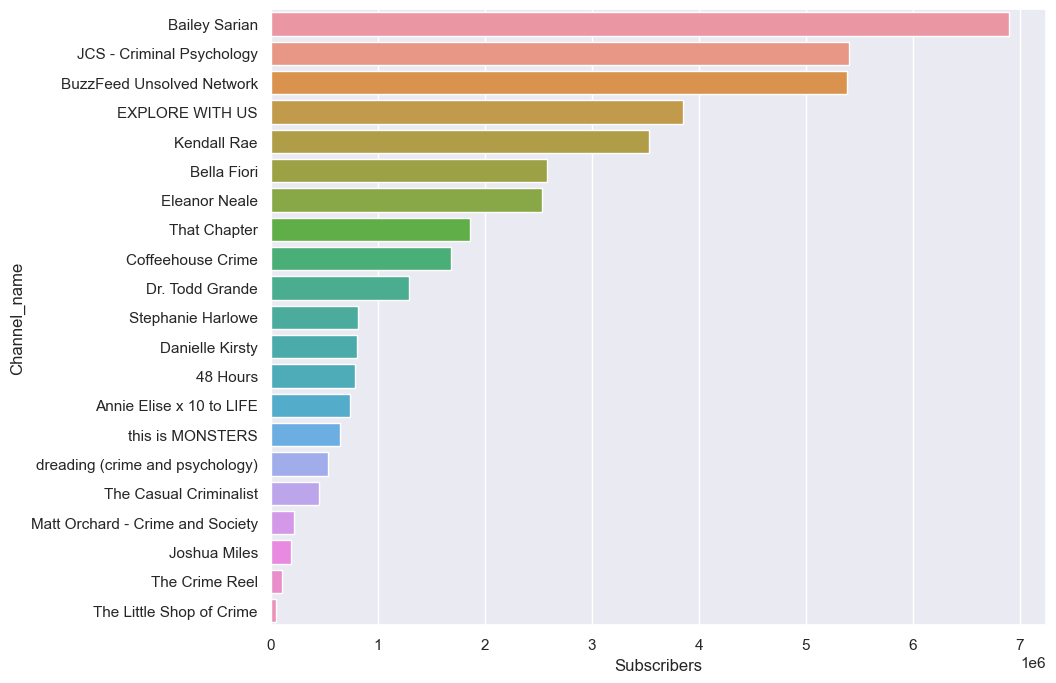

In [11]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(channel_data, x='Subscribers', y='Channel_name')

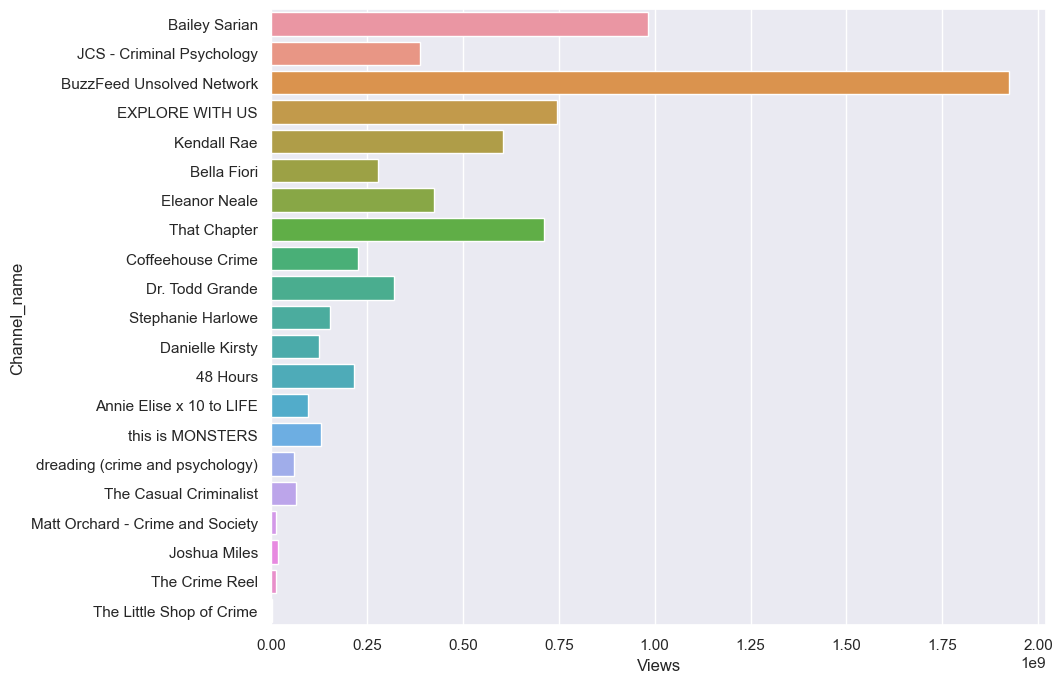

In [12]:
ax = sns.barplot(channel_data, y='Channel_name', x='Views')

I'm starting to think that BuzzFeed Unsolved Network has way more than just the true crime, in which case I'm going to delete it from this analysis.

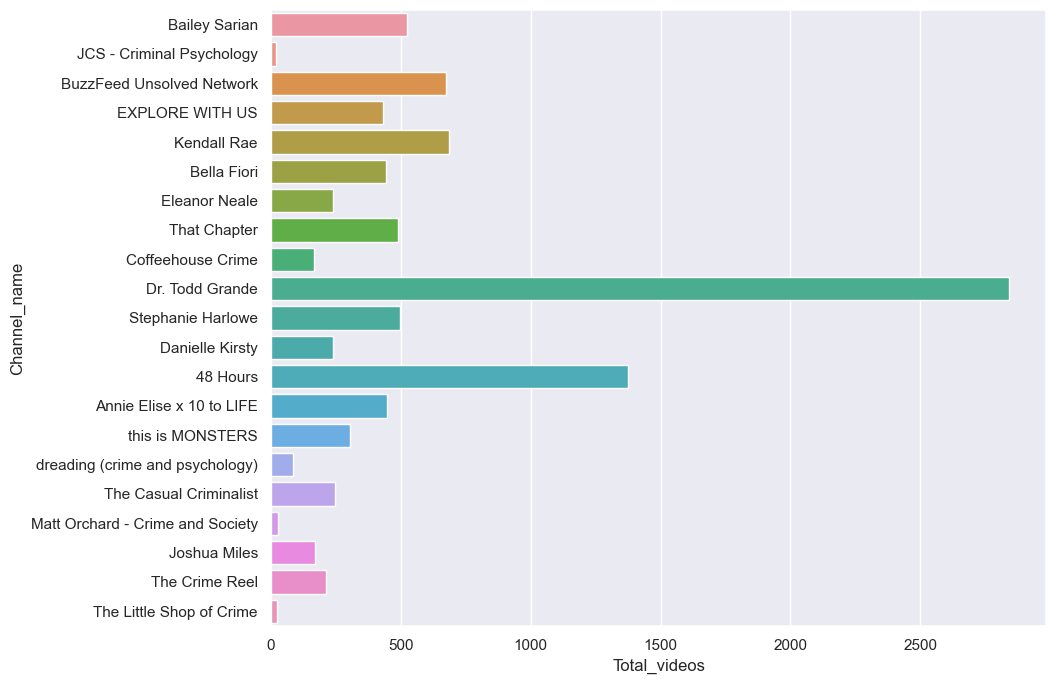

In [13]:
ax = sns.barplot(channel_data, y='Channel_name', x='Total_videos')

Hmmm. Maybe not.

Now, the last column in this new dataframe is playlist_id.  This is the id for the "playlist" of *all* videos uploaded by that YouTuber.  From each playlist_id, we can get information about all of the videos, like title, views, likes, description, and more.

In [14]:
# function to fetch all video id's from the upload playlist id
# def get_video_ids_limit(youtube, playlist_id):
#     video_ids = []
#     for id in channel_data['playlist_id']:
#         request = youtube.playlistItems().list(
#                     part = 'contentDetails',
#                     playlistId = playlist_id,
#                     maxResults = 50)
#         response = request.execute()
    
#     for r in response['items']:
#         vid_id = r['contentDetails']['videoId']
#         video_ids.append(vid_id)
    
#     return video_ids

In [15]:
# bailey_playlist = channel_data[channel_data['Channel_name']=="Bailey Sarian"]['playlist_id'][0]
# bailey_ids = get_video_ids_limit(youtube, bailey_playlist)

In [16]:
# len(bailey_ids)

Next, I'm going to write a new function so I remember the simplicity of the old one.  (Also because the last time I extended this to use nextPageToken it fell apart. 😵‍💫)

## Function to get ALL video ids from a channel

In [17]:
# Write the function to get ALL video id's even though there is a limit of 50 at a time through the API
def get_video_ids(youtube, playlist_id):
    video_ids = []
    for id in channel_data['playlist_id']:
        request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    maxResults = 50)
        response = request.execute()
    
    for r in response['items']:
        vid_id = r['contentDetails']['videoId']
        video_ids.append(vid_id)
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            for id in channel_data['playlist_id']:
                request = youtube.playlistItems().list(
                            part = 'contentDetails',
                            playlistId = playlist_id,
                            maxResults = 50,
                            pageToken = next_page_token)
                response = request.execute()
            for r in response['items']:
                vid_id = r['contentDetails']['videoId']
                video_ids.append(vid_id)
            next_page_token = response.get('nextPageToken')
            
    
    return video_ids

In [18]:
# bailey_vid_ids = get_video_ids(youtube, bailey_playlist)

In [19]:
# len(bailey_vid_ids)

This worked well, so let's clean up and find relevant info from one YouTuber at a time, then we can put them all back together again later.

# Create a dataframe for each YouTuber

## Function to get video details

In [20]:
def get_video_details(youtube, video_ids):
    
    all_video_stats = []
    
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
                    part='snippet, statistics',
                    id=','.join(video_ids[i:i+50]))
        response = request.execute()
            
        for r in response['items']:
            try:
                video_stats = dict(Title = r['snippet']['title'],
                                   PublishedDate = r['snippet']['publishedAt'],
                                   Views = r['statistics']['viewCount'],
                                   Likes = r['statistics']['likeCount'],
                                   Comments = r['statistics']['commentCount'],
                                   Description = r['snippet']['description']
                                   )
            except:
                try: 
                    video_stats = dict(Title = r['snippet']['title'],
                                       PublishedDate = r['snippet']['publishedAt'],
                                       # Views = r['statistics']['viewCount'],
                                       Likes = r['statistics']['likeCount'],
                                       Comments = r['statistics']['commentCount'],
                                       Description = r['snippet']['description']
                                       )
                except:
                    try: 
                        video_stats = dict(Title = r['snippet']['title'],
                                           PublishedDate = r['snippet']['publishedAt'],
                                           Views = r['statistics']['viewCount'],
                                           Likes = r['statistics']['likeCount'],
                                           Description = r['snippet']['description']
                                           # Comments = r['statistics']['commentCount'],
                                           )
                    except:
                        video_stats = dict(Title = r['snippet']['title'],
                                           PublishedDate = r['snippet']['publishedAt'],
                                           Views = r['statistics']['viewCount'],
                                           # Likes = r['statistics']['likeCount'],
                                           Comments = r['statistics']['commentCount'],
                                           Description = r['snippet']['description']
                                          )
                
            all_video_stats.append(video_stats)
            
    return all_video_stats
        

Let's try this on just one channel first.

In [21]:
# bailey_stats = get_video_details(youtube, bailey_vid_ids)
# len(bailey_stats)

In [22]:
# bailey_df = pd.DataFrame(bailey_stats)
# bailey_df

This time let's do **Dreading (Crime and Psychology)** as a test.  It has more than 50 but less than 100, so I won't use as many YouTube credits.

In [23]:
dread_id = channel_data.loc[15]['playlist_id']
dread_vids = get_video_ids(youtube, dread_id)
len(dread_vids)

86

In [24]:
dread_stats = get_video_details(youtube, dread_vids)
len(dread_stats)

86

In [25]:
dread = pd.DataFrame(dread_stats)
dread

,Title,PublishedDate,Views,Likes,Comments,Description
0,When your roommate kills his family,2023-05-17T15:00:01Z,270869,12972,1754,consider supporting us via patreon : https://p...
1,When your son kills your daughter,2023-05-10T16:38:00Z,303041,14765,1973,consider supporting us via patreon : https://p...
2,Parents accidentally prove they are guilty | t...,2023-05-06T15:00:26Z,440646,12333,4537,consider supporting us via patreon : https://p...
3,What it's like to date a 13 year old psychopat...,2023-04-26T15:00:31Z,250625,9193,1304,consider supporting us via patreon : https://p...
4,"""check ur email"" : The case of William Melcher...",2023-04-19T15:00:27Z,249128,16219,1731,consider supporting us via patreon : https://p...
...,...,...,...,...,...,...
81,Josh Duggar: The Man Who (Almost) Got Away Wit...,2022-02-16T17:27:45Z,2393165,50741,9537,https://www.patreon.com/dreading\n\nTime Stamp...
82,The Case of Chandler Halderson | dreading,2022-02-09T16:00:35Z,1564470,24688,4804,https://www.patreon.com/dreading\n\nThank you ...
83,The Murder of Lauren Giddings | dreading,2022-02-02T16:00:36Z,870355,17247,4415,https://www.patreon.com/dreading\n\nThank you ...
84,The Case of Patrick Giovanditto | dreading,2022-01-26T16:00:15Z,258061,8241,687,https://www.patreon.com/dreading\n\ntime stamp...


In [26]:
dread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          86 non-null     object
 1   PublishedDate  86 non-null     object
 2   Views          86 non-null     object
 3   Likes          86 non-null     object
 4   Comments       80 non-null     object
 5   Description    86 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB


In [27]:
dread['PublishedDate'] = pd.to_datetime(dread['PublishedDate'], utc=True)
dread['Views'] = pd.to_numeric(dread['Views'])
dread['Likes'] = pd.to_numeric(dread['Likes'])
dread['Comments'] = pd.to_numeric(dread['Comments'])
dread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Title          86 non-null     object             
 1   PublishedDate  86 non-null     datetime64[ns, UTC]
 2   Views          86 non-null     int64              
 3   Likes          86 non-null     int64              
 4   Comments       80 non-null     float64            
 5   Description    86 non-null     object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [28]:
dread['PublishedDate'] = dread['PublishedDate'].dt.date
dread.head()

,Title,PublishedDate,Views,Likes,Comments,Description
0,When your roommate kills his family,2023-05-17,270869,12972,1754.0,consider supporting us via patreon : https://p...
1,When your son kills your daughter,2023-05-10,303041,14765,1973.0,consider supporting us via patreon : https://p...
2,Parents accidentally prove they are guilty | t...,2023-05-06,440646,12333,4537.0,consider supporting us via patreon : https://p...
3,What it's like to date a 13 year old psychopat...,2023-04-26,250625,9193,1304.0,consider supporting us via patreon : https://p...
4,"""check ur email"" : The case of William Melcher...",2023-04-19,249128,16219,1731.0,consider supporting us via patreon : https://p...


In [29]:
dread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          86 non-null     object 
 1   PublishedDate  86 non-null     object 
 2   Views          86 non-null     int64  
 3   Likes          86 non-null     int64  
 4   Comments       80 non-null     float64
 5   Description    86 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.2+ KB


In [30]:
top_ten = dread.sort_values(['Views'], ascending=False).head(10)

In [31]:
top_ten

,Title,PublishedDate,Views,Likes,Comments,Description
63,The Case of Jared Fogle: From Five Dollar Foot...,2022-05-25,2704185,67565,10276.0,consider supporting us via patreon : https://p...
73,The Case of Mark Salling |dreading,2022-04-03,2503316,62671,NaN,https://patreon.com/dreading\n\nThank you for ...
81,Josh Duggar: The Man Who (Almost) Got Away Wit...,2022-02-16,2393165,50741,9537.0,https://www.patreon.com/dreading\n\nTime Stamp...
80,The Case of Ian Watkins |dreading,2022-02-23,2125937,45177,9629.0,https://www.patreon.com/dreading\n\nThank you ...
74,The Case of Bianca Devins | dreading,2022-03-30,2048228,68738,NaN,Please go sign the Bianca's Law Petition https...
41,Hide and Seek Gone Wrong? : The Case of Sarah ...,2022-09-28,1686577,31299,10796.0,The first 100 people to use code DREADING at t...
82,The Case of Chandler Halderson | dreading,2022-02-09,1564470,24688,4804.0,https://www.patreon.com/dreading\n\nThank you ...
71,The Case of Larry Nassar |dreading,2022-04-13,1521773,28136,7196.0,https://patreon.com/dreading\n\ntime stamps \n...
64,The Case of Sid and Nancy: Pop Culture's Most ...,2022-05-18,1500149,55242,3210.0,Get Surfshark VPN at https://Surfshark.deals/d...
77,when a mother kills her children: the case of ...,2022-03-16,1203576,30028,5246.0,https://www.patreon.com/dreading\n\nthumbnail ...


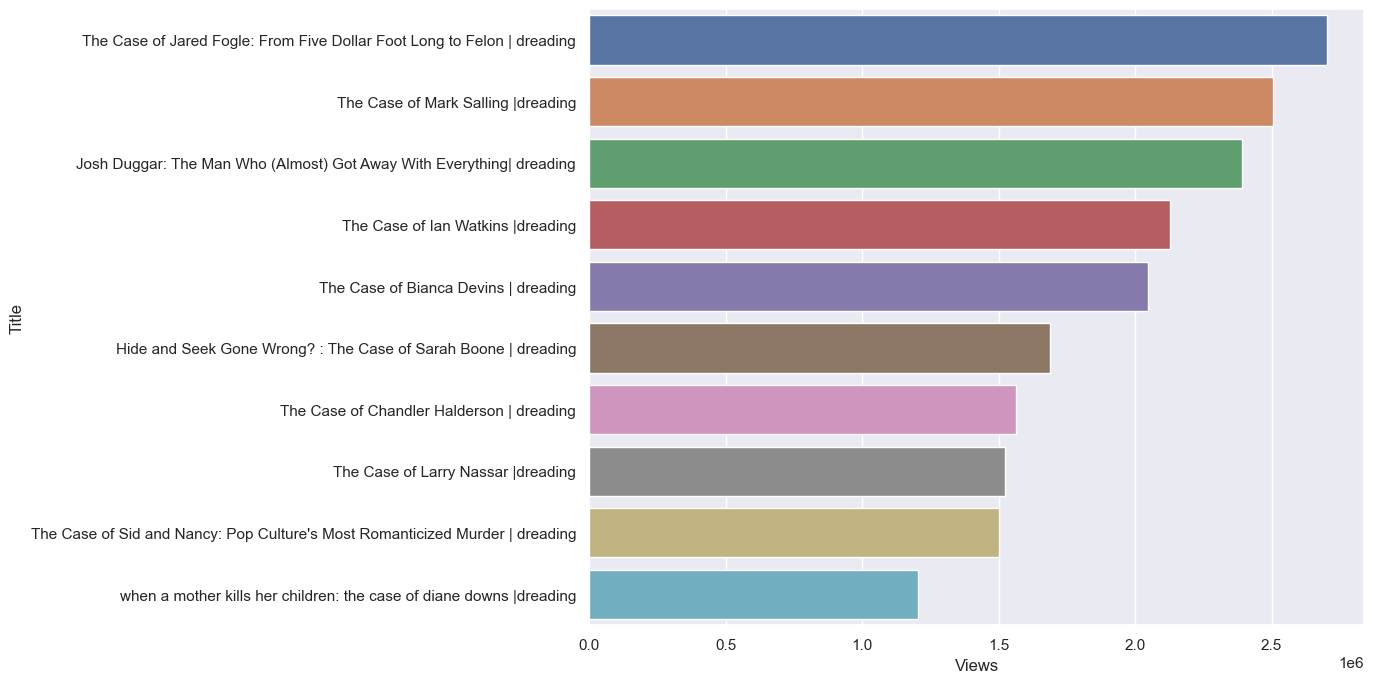

In [32]:
ax1 = sns.barplot(x="Views", y='Title', data=top_ten)

In [33]:
dread['Month'] = pd.to_datetime(dread['PublishedDate']).dt.strftime('%b')
dread.head()

,Title,PublishedDate,Views,Likes,Comments,Description,Month
0,When your roommate kills his family,2023-05-17,270869,12972,1754.0,consider supporting us via patreon : https://p...,May
1,When your son kills your daughter,2023-05-10,303041,14765,1973.0,consider supporting us via patreon : https://p...,May
2,Parents accidentally prove they are guilty | t...,2023-05-06,440646,12333,4537.0,consider supporting us via patreon : https://p...,May
3,What it's like to date a 13 year old psychopat...,2023-04-26,250625,9193,1304.0,consider supporting us via patreon : https://p...,Apr
4,"""check ur email"" : The case of William Melcher...",2023-04-19,249128,16219,1731.0,consider supporting us via patreon : https://p...,Apr


In [34]:
dreading_by_month = dread.groupby('Month', as_index=False).size()
dreading_by_month

,Month,size
0,Apr,9
1,Aug,4
2,Dec,3
3,Feb,9
4,Jan,9
5,Jul,6
6,Jun,6
7,Mar,13
8,May,10
9,Nov,6


In [35]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [36]:
dreading_by_month.index = pd.CategoricalIndex(dreading_by_month['Month'], categories=sort_order, ordered=True)
dreading_by_month

,Month,size
Month,,
Apr,Apr,9
Aug,Aug,4
Dec,Dec,3
Feb,Feb,9
Jan,Jan,9
Jul,Jul,6
Jun,Jun,6
Mar,Mar,13
May,May,10


In [37]:
dreading_by_month.drop('Month', axis=1, inplace=True)
dreading_by_month

,size
Month,
Apr,9
Aug,4
Dec,3
Feb,9
Jan,9
Jul,6
Jun,6
Mar,13
May,10


In [38]:
dreading_by_month = dreading_by_month.sort_index()
dreading_by_month

,size
Month,
Jan,9
Feb,9
Mar,13
Apr,9
May,10
Jun,6
Jul,6
Aug,4
Sep,5


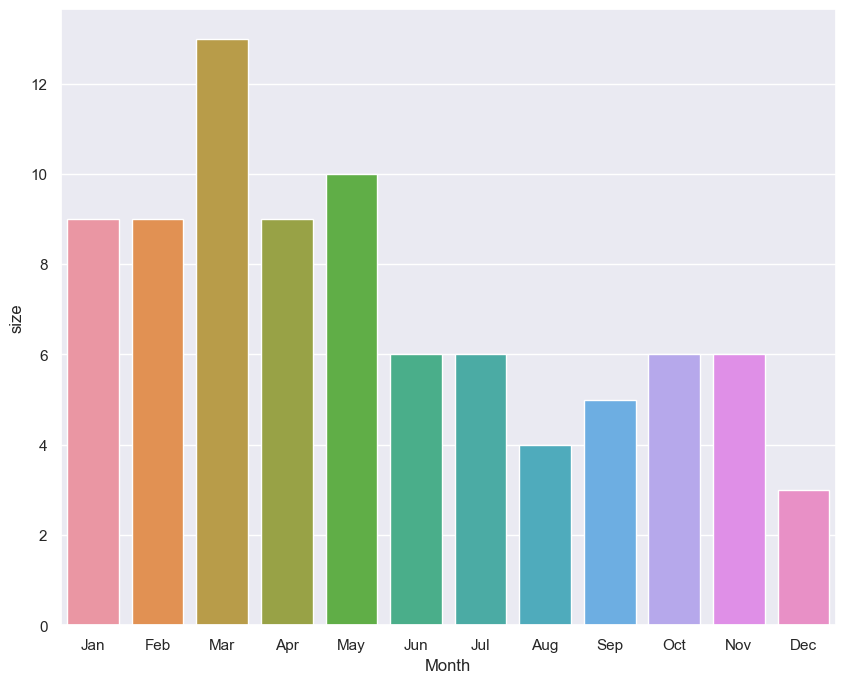

In [39]:
ax2 = sns.barplot(x=dreading_by_month.index, y='size', data=dreading_by_month)

## Make the rest of the dataframes (one for each of the other 20 channels)

In [40]:
# first, come up with short, descriptive names for each dataframe
# we will remake the bailey sarian we did above for consistency
names = ['bailey','jcs','buzzfeed','explore','kendall','bella','eleanor','chapter','coffee','grande','harlowe',
         'kirsty','forty8','annie','monsters','dreading','casual','orchard','miles','reel','shop']
# names = [bailey, jcs, buzzfeed, explore]
len(names)

21

### Make a list of all video ids for each channel

In [41]:
vid_ids_dict = {}
i = 0

for name in names:
    print(f"Getting playlist ids for {name}...{20-i} more to go...")
    playlist_id = channel_data.iloc[i]['playlist_id']
    ids = get_video_ids(youtube, playlist_id)
    vid_ids_dict[name] = ids
    i += 1
    
len(vid_ids_dict)

Getting playlist ids for bailey...20 more to go...
Getting playlist ids for jcs...19 more to go...
Getting playlist ids for buzzfeed...18 more to go...
Getting playlist ids for explore...17 more to go...
Getting playlist ids for kendall...16 more to go...
Getting playlist ids for bella...15 more to go...
Getting playlist ids for eleanor...14 more to go...
Getting playlist ids for chapter...13 more to go...
Getting playlist ids for coffee...12 more to go...
Getting playlist ids for grande...11 more to go...
Getting playlist ids for harlowe...10 more to go...
Getting playlist ids for kirsty...9 more to go...
Getting playlist ids for forty8...8 more to go...
Getting playlist ids for annie...7 more to go...
Getting playlist ids for monsters...6 more to go...
Getting playlist ids for dreading...5 more to go...
Getting playlist ids for casual...4 more to go...
Getting playlist ids for orchard...3 more to go...
Getting playlist ids for miles...2 more to go...
Getting playlist ids for reel...1

21

Check the lengths of a few of the playlists

In [42]:
len(vid_ids_dict["kendall"])

686

In [43]:
len(vid_ids_dict['shop'])

24

In [44]:
vid_ids_dict['jcs']

['Hy6XsXseDfM',
 '4iluOmq1DYY',
 'CGuEdN-ju2g',
 'Mwt35SEeR9w',
 'N274EurzpAA',
 'BemHqUqcpI8',
 'UQt46gvYO40',
 'eJt_afGN3IQ',
 '9x2NaGkl6BI',
 'HkRjIq8Cp2A',
 'j3PLLOreTLY',
 'sVF_SlzxBJ4',
 'L0H6xYwMQnk',
 '7JttwV6XZ_I',
 '1J2YOLQM2Yc',
 'sv0iN5J-9mk',
 'WLSNPkf8RCU',
 'jJZv3z7FOt0',
 'nVZhV7M3mNE',
 'Xfg861hO-Ag']

## Create a dataframe for each channel using its video ids

In [45]:
# names = ['jcs', 'orchard']
# it worked great with just two!! :)
# now let's do them all

for name in names:
    print(f"Building dataframe {name}...")
    stats = get_video_details(youtube, vid_ids_dict[name])
    vars()[name] = pd.DataFrame(stats)

Building dataframe bailey...
Building dataframe jcs...
Building dataframe buzzfeed...
Building dataframe explore...
Building dataframe kendall...
Building dataframe bella...
Building dataframe eleanor...
Building dataframe chapter...
Building dataframe coffee...
Building dataframe grande...
Building dataframe harlowe...
Building dataframe kirsty...
Building dataframe forty8...
Building dataframe annie...
Building dataframe monsters...
Building dataframe dreading...
Building dataframe casual...
Building dataframe orchard...
Building dataframe miles...
Building dataframe reel...
Building dataframe shop...


Check out the first 2 rows of each dataframe

In [46]:
for name in names:
    print(f"\n\n======================================================================================\n{name}:")
    display(vars()[name].head(2))



bailey:


,Title,PublishedDate,Views,Likes,Comments,Description
0,A Killer Deadlier than Hitler? Joseph Stalin P...,2023-05-18T19:00:06Z,338049,14947,1454,"Hi friends, happy Thursday!\n\nWelcome to the ..."
1,His Waterbed Secrets - Life Sentence At 14?! J...,2023-05-15T19:00:18Z,1785418,67665,5289,"Hi friends, happy Monday!\n\nJoshua Phillips c..."




jcs:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Sarah literally thinks she's going home later...,2023-03-24T23:36:10Z,13742657,293959,57498,"""So, when am I getting my stuff back?""\n\nSpec..."
1,"Son Spends $275,000 of Dad’s Money on Virtual ...",2023-02-15T18:46:28Z,7645125,220953,46663,"""A wise man once told me...""\nTCL Analysis - h..."




buzzfeed:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Why Death Smells #shorts,2023-05-22T18:00:06Z,8707,328,9,Special thank you to Roy L. Gilmore Funeral Home.
1,The Most Notorious Serial Killer From Iowa #sh...,2023-05-19T18:00:12Z,15091,488,19,




explore:


,Title,PublishedDate,Views,Likes,Comments,Description
0,When An Evil Mother Realizes She's Been Caught,2023-05-14T22:48:51Z,2700360,69574,14585,"In today's true crime documentary, we're cover..."
1,Predator Realizes He's Going To Prison For Life,2023-05-07T17:42:45Z,3185249,63027,6648,"In today's true crime documentary, we're cover..."




kendall:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Chloe Stein FAKED Her Own Kidnapping!?,2023-05-22T18:00:20Z,336197,19036,1852,The first 100 people to use code KENDALLRAE at...
1,Lies Exposed Around the Death of Shanquella Ro...,2023-05-19T18:00:21Z,37386,2535,69,"With this newfound evidence, its clear that th..."




bella:


,Title,PublishedDate,Views,Likes,Comments,Description
0,CASSIE STODDART: THE SCREAM KILLERS,2023-05-15T17:01:35Z,243475,9115,340,follow my other social media :) \n\nInstagram...
1,SOLVED | THE DISCORD KILLER,2023-05-08T17:01:56Z,307136,12221,479,follow my other social media :) \n\nInstagram...




eleanor:


,Title,PublishedDate,Views,Likes,Comments,Description
0,He Hid 'Murder Kits' All Over America,2023-05-04T18:30:12Z,822866,27740,1670,AD - Claim your SPECIAL OFFER for MagellanTV h...
1,The Twisted Mind Of Casey Anthony,2023-04-19T21:18:00Z,1440623,47109,4372,AD - Go to https://casetify.com/eleanor to sa...




chapter:


,Title,PublishedDate,Views,Likes,Comments,Description
0,The Cruel Affair of Micaela Costanzo,2023-05-16T19:00:31Z,704660,38745,5231,Get your exclusive NordVPN deal here https://n...
1,The Sinister Plot of Sheila Davalloo,2023-05-12T19:00:22Z,692182,37000,2593,"In Connecticut, there was an office romance. T..."




coffee:


,Title,PublishedDate,Views,Likes,Comments,Description
0,"He Turned his victims into ""BBQ Pork""... | The...",2023-05-18T15:00:40Z,530010,25385,1625,Henry Chau was a troubled man. He was a consis...
1,She lured men in to murder them... | The Case ...,2023-05-15T15:00:25Z,543201,29386,2986,"Sarah M, also known as Domina Cherry, had a hi..."




grande:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Unfaithful Wife Enters Haphazard Conspiracy wi...,2023-05-23T13:26:33Z,5916,875,0,This video answers the question: Can I analyze...
1,City Councilman with Troubled Past Ends Career...,2023-05-22T16:22:51Z,42189,3172,664,This video answers the question: Can I analyze...




harlowe:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Coffee and Crime Time: Noel Rodriguez Alvarez,2023-05-18T22:09:52Z,184100,11354,1476,Thank you Helix Sleep for sponsoring! Click he...
1,The Mystery Of The Missing Fort Worth Trio: Pa...,2023-05-13T18:31:22Z,182279,10297,920,Save 20% on your first Native purchase! Click...




kirsty:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Spoilt Entitled Rich Girl Masterminded her Par...,2023-05-22T16:56:03Z,216724,13443,805,Sponsored by Home Design Makeover - Start solv...
1,"The MASTER Manipulator Who Conned Women, Faked...",2023-05-14T21:11:59Z,458855,18497,1180,Go to https://expressvpn.com/danielle and find...




forty8:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Where is Jennifer Kesse? | Full Episode,2023-05-23T11:00:02Z,96687,3568,571,A young woman vanishes from her Florida condo ...
1,New Jersey woman survives stabbing during home...,2023-05-20T23:00:03Z,48127,1289,121,Donna Ongsiako was getting ready to go to bed ...




annie:


,Title,PublishedDate,Views,Likes,Comments,Description
0,When an ordinary housewife committed a heinous...,2023-05-23T14:59:33Z,1670,163,0,When a seemingly ordinary housewife committed ...
1,"Idaho Murders: Bryan Kohberger Arraignment ""St...",2023-05-22T19:50:29Z,154376,11152,1670,Link to Idaho Documentary: https://youtu.be/k-...




monsters:


,Title,PublishedDate,Views,Likes,Comments,Description
0,5 People Killed Over Food 02: Hashem Zayed #Sh...,2023-05-23T07:00:14Z,4847,602,42,Hashem Zayed liked to make poached eggs for pr...
1,5 People Killed Over Food 01: Glenn Hirsch #Sh...,2023-05-22T07:15:00Z,12461,1342,140,I'm doing list episodes as #Shorts now. Each d...




dreading:


,Title,PublishedDate,Views,Likes,Comments,Description
0,When your roommate kills his family,2023-05-17T15:00:01Z,270909,12975,1754,consider supporting us via patreon : https://p...
1,When your son kills your daughter,2023-05-10T16:38:00Z,303054,14765,1973,consider supporting us via patreon : https://p...




casual:


,Title,PublishedDate,Views,Likes,Comments,Description
0,The Murder of Albert Snyder #shorts,2023-05-23T15:00:23Z,836,115,0,#shorts \n\nSimon's Social Media:\nTwitter: ht...
1,"The Murders That Inspired ‘Chicago’, Part Two ...",2023-05-22T15:00:11Z,7448,787,12,#shorts \n\nSimon's Social Media:\nTwitter: ht...




orchard:


,Title,PublishedDate,Views,Likes,Comments,Description
0,The Unspeakable Murder of Savanna Greywind,2023-05-11T19:00:05Z,158224,7679,1352,An examination of the murder of Savanna Greywi...
1,This is What a Lazy-Bones Looks Like | Cart Na...,2023-04-01T19:00:31Z,119127,10324,2885,An explanation of the epidemic of loose shoppi...




miles:


,Title,PublishedDate,Views,Likes,Comments,Description
0,Inside the Investigation: How a SUITCASE solve...,2023-02-28T22:18:37Z,35486,2161,98,👒🔍 Download June’s Journey for free now using ...
1,The Police Ignored Their Calls For Help - The ...,2023-02-19T21:00:19Z,65195,2698,170,"In this episode, we discuss the devastating ca..."




reel:


,Title,PublishedDate,Views,Likes,Comments,Description
0,When a Peacock wants to help out ...,2023-05-13T20:00:02Z,1854,402,92,Shorts Video about a Peacock wants to get invo...
1,Haunted Secrets: The Haunting Tale of Don Henr...,2023-05-10T11:00:05Z,13599,1624,345,Two teenage friends meet a horrifying end whic...




shop:


,Title,PublishedDate,Views,Likes,Comments,Description
0,The Sickening Case of Zara Aleena,2023-05-06T15:33:04Z,17890,1392,175,"On a warm summer night last year, a predator w..."
1,This 1km Trail of Blood Led to a Brutal Crime ...,2023-03-27T19:44:23Z,193417,5410,447,On a hot and humid summer afternoon in Singapo...


### Fix data types

In [47]:
jcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          20 non-null     object
 1   PublishedDate  20 non-null     object
 2   Views          20 non-null     object
 3   Likes          20 non-null     object
 4   Comments       20 non-null     object
 5   Description    20 non-null     object
dtypes: object(6)
memory usage: 1.1+ KB


In [48]:
# we'll do the easy columns first:)
for name in names:
    vars()[name]['Views'] = pd.to_numeric(vars()[name]['Views'])
    vars()[name]['Likes'] = pd.to_numeric(vars()[name]['Likes'])
    vars()[name]['Comments'] = pd.to_numeric(vars()[name]['Comments'])
jcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          20 non-null     object
 1   PublishedDate  20 non-null     object
 2   Views          20 non-null     int64 
 3   Likes          20 non-null     int64 
 4   Comments       20 non-null     int64 
 5   Description    20 non-null     object
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


In [49]:
for name in names:
    vars()[name]['PublishedDate'] = pd.to_datetime(vars()[name]['PublishedDate'], utc=True)

In [50]:
jcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Title          20 non-null     object             
 1   PublishedDate  20 non-null     datetime64[ns, UTC]
 2   Views          20 non-null     int64              
 3   Likes          20 non-null     int64              
 4   Comments       20 non-null     int64              
 5   Description    20 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 1.1+ KB


In [51]:
for name in names:
    vars()[name]['PublishedDate'] = vars()[name]['PublishedDate'].dt.date

In [52]:
jcs.head()

,Title,PublishedDate,Views,Likes,Comments,Description
0,Sarah literally thinks she's going home later...,2023-03-24,13742657,293959,57498,"""So, when am I getting my stuff back?""\n\nSpec..."
1,"Son Spends $275,000 of Dad’s Money on Virtual ...",2023-02-15,7645125,220953,46663,"""A wise man once told me...""\nTCL Analysis - h..."
2,Yeardley's Ex-Boyfriend,2022-12-21,6139838,310396,77743,One Love - https://www.joinonelove.org/\n\nTC...
3,What pretending to be crazy looks like,2021-05-26,64689378,1752325,198038,Does the demon have an attorney? \nTCL- https:...
4,Wrath of Jodi,2020-12-24,34545676,584407,137877,"""We had a dog. His name was Doggy Boy.""\nTRUE ..."


In [53]:
for name in names:
    vars()[name]['Month'] = pd.to_datetime(vars()[name]['PublishedDate']).dt.strftime('%b')

In [54]:
jcs.head()

,Title,PublishedDate,Views,Likes,Comments,Description,Month
0,Sarah literally thinks she's going home later...,2023-03-24,13742657,293959,57498,"""So, when am I getting my stuff back?""\n\nSpec...",Mar
1,"Son Spends $275,000 of Dad’s Money on Virtual ...",2023-02-15,7645125,220953,46663,"""A wise man once told me...""\nTCL Analysis - h...",Feb
2,Yeardley's Ex-Boyfriend,2022-12-21,6139838,310396,77743,One Love - https://www.joinonelove.org/\n\nTC...,Dec
3,What pretending to be crazy looks like,2021-05-26,64689378,1752325,198038,Does the demon have an attorney? \nTCL- https:...,May
4,Wrath of Jodi,2020-12-24,34545676,584407,137877,"""We had a dog. His name was Doggy Boy.""\nTRUE ...",Dec


## Make one big dataframe with all channels together

In [55]:
names

['bailey',
 'jcs',
 'buzzfeed',
 'explore',
 'kendall',
 'bella',
 'eleanor',
 'chapter',
 'coffee',
 'grande',
 'harlowe',
 'kirsty',
 'forty8',
 'annie',
 'monsters',
 'dreading',
 'casual',
 'orchard',
 'miles',
 'reel',
 'shop']

In [56]:
name_map = {"bailey":"Bailey Sarian","jcs":"JCS - Criminal Psychology","buzzfeed":"Buzzfeed Unsolved True Crime",
            "explore":"Explore with Us","kendall":"Kendall Rae","bella":"Bella Fiori",
            "eleanor":"Eleanor Neale","chapter":"That Chapter","coffee":"Coffeehouse Crime",
            "grande":"Dr. Todd Grande","harlowe":"Stephanie Harlowe","kirsty":"Danielle Kirsty",
            "forty8":"48 Hours","annie":"Annie Elise x 10 to LIFE","monsters":"this is MONSTERS",
            "dreading":"dreading (crime and psychology)","casual":"The Casual Criminalist","orchard":"Matt Orchard - Crime and Society",
            "miles":"Joshua Miles","reel":"Crime Reel","shop":"Little Shop of Crime",
            }

In [57]:
id_df.channel_name.loc[16] = 'Dr. Todd Grande'

In [58]:
for name in names:
    vars()[name]['Channel'] = name
jcs

,Title,PublishedDate,Views,Likes,Comments,Description,Month,Channel
0,Sarah literally thinks she's going home later...,2023-03-24,13742657,293959,57498,"""So, when am I getting my stuff back?""\n\nSpec...",Mar,jcs
1,"Son Spends $275,000 of Dad’s Money on Virtual ...",2023-02-15,7645125,220953,46663,"""A wise man once told me...""\nTCL Analysis - h...",Feb,jcs
2,Yeardley's Ex-Boyfriend,2022-12-21,6139838,310396,77743,One Love - https://www.joinonelove.org/\n\nTC...,Dec,jcs
3,What pretending to be crazy looks like,2021-05-26,64689378,1752325,198038,Does the demon have an attorney? \nTCL- https:...,May,jcs
4,Wrath of Jodi,2020-12-24,34545676,584407,137877,"""We had a dog. His name was Doggy Boy.""\nTRUE ...",Dec,jcs
5,Guilty until proven innocent.,2020-10-08,20443336,658709,70586,“I assure you this will be looked into thoroug...,Oct,jcs
6,Jennifer's Solution,2020-09-03,40764246,712684,144015,The Infamous Case of Jennifer Pan.\nTCL - http...,Sep,jcs
7,There's Something About Casey...,2020-08-01,29018614,467842,127814,The psychology of Casey Anthony.\nTRUE CRIME L...,Aug,jcs
8,"The Legend of ""Jeff""",2020-06-30,18439514,531060,50822,"""How about that butterfinger you promised?""\nJ...",Jun,jcs
9,The Bizarre Case of Stephen McDaniel,2020-06-16,17408465,346086,79340,"""Why Stephen… Why?""\nTRUE CRIME Loser - https:...",Jun,jcs


In [59]:
for name in names:
    vars()[name]['Channel'] = vars()[name]['Channel'].map(name_map)
jcs.head()

,Title,PublishedDate,Views,Likes,Comments,Description,Month,Channel
0,Sarah literally thinks she's going home later...,2023-03-24,13742657,293959,57498,"""So, when am I getting my stuff back?""\n\nSpec...",Mar,JCS - Criminal Psychology
1,"Son Spends $275,000 of Dad’s Money on Virtual ...",2023-02-15,7645125,220953,46663,"""A wise man once told me...""\nTCL Analysis - h...",Feb,JCS - Criminal Psychology
2,Yeardley's Ex-Boyfriend,2022-12-21,6139838,310396,77743,One Love - https://www.joinonelove.org/\n\nTC...,Dec,JCS - Criminal Psychology
3,What pretending to be crazy looks like,2021-05-26,64689378,1752325,198038,Does the demon have an attorney? \nTCL- https:...,May,JCS - Criminal Psychology
4,Wrath of Jodi,2020-12-24,34545676,584407,137877,"""We had a dog. His name was Doggy Boy.""\nTRUE ...",Dec,JCS - Criminal Psychology


Now put all dataframes together.

In [60]:
frames = []
for name in names:
    frames.append(vars()[name])

In [61]:
len(frames)

21

In [62]:
type(frames[0])

pandas.core.frame.DataFrame

In [63]:
len(frames[0])

524

In [64]:
all_channels = pd.concat(frames)
all_channels.shape

(10126, 8)

### Create dataset

In [65]:
all_channels.to_csv('data/true_crime_channel_stats.csv')

In [66]:
names

['bailey',
 'jcs',
 'buzzfeed',
 'explore',
 'kendall',
 'bella',
 'eleanor',
 'chapter',
 'coffee',
 'grande',
 'harlowe',
 'kirsty',
 'forty8',
 'annie',
 'monsters',
 'dreading',
 'casual',
 'orchard',
 'miles',
 'reel',
 'shop']

# Look for criminal names in `Titles` and `Descriptions`

### Which titles are more helpful than others

In [67]:
for name in names:
    title_name = name
    title_name += "_titles"
    vars()[title_name] = vars()[name][['Title']]

In [68]:
pd.set_option('display.max_colwidth', 180)
bailey_titles

,Title
0,A Killer Deadlier than Hitler? Joseph Stalin Part 2 | Dark History with Bailey Sarian
1,His Waterbed Secrets - Life Sentence At 14?! Joshua Phillips | Mystery & Makeup | Bailey Sarian
2,The Mass Murderer Nobody Talks About: Joseph Stalin Part 1 | Dark History with Bailey Sarian
3,The Woodworking Wacko - Psychopath Cameron Hooker | Mystery & Makeup | Bailey Sarian
4,This Bloody Crime Saved Our Lives: The Dark History of 911 | Dark History with Bailey Sarian
...,...
519,WHATS IN MY BAG ?!
520,DRAMATIC LINER // SMOKEY MAKEUP TUTORIAL
521,DRUGSTORE HAUL // FIRST IMPRESSION
522,RED LIP // SIMPLE GOLD SHADOW TUTORIAL


If I use Bailey's, I'll only use the *Murder, Mystery, & Makeup Monday* videos.  The name I want would be in a part of the title before a veritcal pipe.

In [69]:
chapter_titles

,Title
0,The Cruel Affair of Micaela Costanzo
1,The Sinister Plot of Sheila Davalloo
2,The Shocking Crimes of the Insane Lanz Brothers
3,Lying to Police After He Lured Victim to his Apartment
4,The Bizarre Case of Sheila Keen-Warren
...,...
486,The TERRIFYING Story of the WHISTLER | Reddit Horror Story
487,The Truth About HAARP
488,5 Creepy Unsolved Disappearances
489,Real Life Truman Show | Susunu! Denpa Shōnen


It looks like *That Chapter often has the name in the title, but not always*

In [70]:
harlowe_titles

,Title
0,Coffee and Crime Time: Noel Rodriguez Alvarez
1,The Mystery Of The Missing Fort Worth Trio: Part 2
2,The Mystery of The Fort Worth Trio: PART 1
3,Strange & Unusual: CENTRALIA- Part 2
4,Strange And Unusual: CENTRALIA- Part 1
...,...
498,ONE STAR REVIEWS!!!! (sunday riley) BUT WHY?!?!
499,April Loves And Losses!!!!!
500,J-Beauty! Get Glowing Skin With Tatcha!
501,Pregnancy Safe Skincare!


In [71]:
buzzfeed_titles

,Title
0,Why Death Smells #shorts
1,The Most Notorious Serial Killer From Iowa #shorts
2,An Undertaker Answer Questions About Death #shorts
3,I Escaped North Korea #shorts
4,Was The Author Of Alice In Wonderland Actually Jack The Ripper?! #shorts
...,...
671,The Strange Deaths Of The 9 Hikers Of Dyatlov Pass
672,The Chilling Mystery Of The Black Dahlia
673,The Bizarre Death Of Elisa Lam
674,The Horrifying Unsolved Slaughter At Hinterkaifeck Farm


In [72]:
grande_titles

,Title
0,Unfaithful Wife Enters Haphazard Conspiracy with New Lover | Nikki Sue Entzel Case Analysis
1,City Councilman with Troubled Past Ends Career on a High Note | Matthew Reilly Case Analysis
2,"Dark Triad Traits, Sex Drive, and Sexual Fantasies #shorts"
3,"Stalker Hides in Attic of OnlyFans ""Talent"" | Mauricio Guerrero Case Analysis"
4,What is Relationship Obsessive Compulsive Disorder (ROCD)? #shorts
...,...
2837,ANOVA in Excel
2838,Standard Normal Distribution in Excel
2839,"Statistical Significance, Effect Size, Error"
2840,Random Assignment in SPSS


So far Dr. Grande looks like he might be the best to start with

In [73]:
forty8_titles

,Title
0,Where is Jennifer Kesse? | Full Episode
1,New Jersey woman survives stabbing during home invasion
2,"Woman's love for her daughter helped her survive: ""A mother's instinct"""
3,The COVID Cover-Up: Searching for Gretchen Anthony | Full Episode
4,Lori Vallow Daybell: Guilty | Full Episode
...,...
1370,"1980 police video of ""sweetheart murders"" crime scene"
1371,"Murder victim's sister speaks to ""48 Hours"""
1372,"Man falsely accused in 1980 murder calls accusation an ""outrage"""
1373,Preview: The Sweetheart Murders


In [74]:
forty8[['Description']]

,Description
0,"A young woman vanishes from her Florida condo – security footage captures a phantom figure calmly parking her car. Is it the kidnapper? ""48 Hours"" correspondent Peter Van Sant ..."
1,"Donna Ongsiako was getting ready to go to bed in her farmhouse in Colts Neck, New Jersey, when an intruder broke into her home and stabbed her repeatedly. Miraculously, she sur..."
2,"Donna Ongsiako was stabbed in her home and left for dead. Her motivation to stay alive? The love for her daughter.\n\nCrime. Social justice. Impact. ""48 Hours"" investigates the..."
3,"A mother disappears. Texts reveal she has coronavirus – was someone using COVID to cover up a killing? ""48 Hours"" correspondent Peter Van Sant reports. Watch more full episodes..."
4,"A jury in Idaho found Lori Vallow Daybell guilty on all charges, including the murders of her two children and conspiracy to commit murder in the death of her husband's first w..."
...,...
1370,"When teens John Riggins and Sabrina Gonsalves were murdered in December 1980, the case marked the first time the Sacramento Sheriff's Dept. videotaped a crime scene. Carol Daly..."
1371,"In 2002, a match on DNA left at the scene of a 1980 murder would point to a teen couple's killer. But the case was far from over. The families of Sabrina Gonsalves and John Rig..."
1372,"Doug Lainer, falsely accused in the 1980 murder of teen couple Sabrina Gonsalves and John Riggins, speaks to ""48 Hours"" during our season premiere,""The Sweetheart Murders"", Sat..."
1373,"""48 Hours"" season premiere: Two murdered teens - 32 years to get justice - and eight years of reporting by ""48 Hours"". Troy Roberts investigates Saturday, Sept. 28 at 10 p.m. ..."


# Write all dataframes to files to not need api key anymore

In [78]:
channel_data.to_csv('data/channel_data.csv')

In [80]:
all_channels.shape

(10126, 8)

In [84]:
for name in names:
    filepath = 'data/'
    filepath += name
    filepath += ".csv"
    vars()[name].to_csv(filepath)

In [92]:
bailey_titles.head()
for name in names:
    df_name = name
    df_name += "_titles"
    filepath = "data/"
    filepath += df_name
    filepath += ".csv"
    vars()[df_name].to_csv(filepath)

## Look for names in the Title column of Dr. Grande's videos

In [94]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.1/867.1 kB 16.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 11.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 27.9 MB/s eta 0:00:0000:0100:01


In [98]:
# Step One: Import nltk and download necessary packages
 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
 
# Step Two: Load Data
 
sentence = "WASHINGTON -- In the wake of a string of abuses by New York police officers in the 1990s, Loretta E. Lynch, the top federal prosecutor in Brooklyn, spoke forcefully about the pain of a broken trust that African-Americans felt and said the responsibility for repairing generations of miscommunication and mistrust fell to law enforcement."

# Step Three: Tokenise, find parts of speech and chunk words 

for sent in nltk.sent_tokenize(sentence):
  for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
     if hasattr(chunk, 'label'):
        print(chunk.label(), ' '.join(c[0] for c in chunk))

GPE WASHINGTON
GPE New York
PERSON Loretta E. Lynch
GPE Brooklyn


[nltk_data] Downloading package punkt to /Users/mhapich/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mhapich/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/mhapich/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/mhapich/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [100]:
# import spacy
import spacy
 
# load spacy model
nlp = spacy.load('en_core_web_sm')
 
# load data
sentence = "Where is Jennifer Kesse? | Full Episode"
doc = nlp(sentence)
 
# print entities
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Jennifer Kesse 9 23 PERSON
Episode 32 39 PERSON


Use code similar to this in a loop to create a list of names for each Title in `grande_titles`

Let's also get one table from wikipedia to start looking at for matching names.

In [101]:
from bs4 import BeautifulSoup
import requests

In [102]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_serial_killers_in_the_United_States'

In [103]:
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text,'html.parset')

FeatureNotFound: Couldn't find a tree builder with the features you requested: html.parset. Do you need to install a parser library?